# 1. Business Understanding

Customer Churn is one of the most challagengeing aspacts in subscription based business like the telco industry. 
This dataset contains churn data of a fictional telco company with realistic data.

The Business questions this notebook aims to address are the following:

1. How many custumers churn? 
2. What is the impact on expected revenue?
3. What features are correlated to churn?
4. How well can a Model predict custumer churn?




# 2. Data Understanding 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.1 Overview of the Data 


In [3]:
#How many rows and how many columns are in the Dataset?
df.shape

(7043, 21)

In [4]:
#How do the continues variables look like 
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#overview on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#convert columns to its expected datatypes
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
# Are all customers ids unique?
df['customerID'].nunique() / df['customerID'].count() == 1

True

### How big is the customer loss and what effects does this have on turnover?

The Churn-Rate in percent is:
26.54


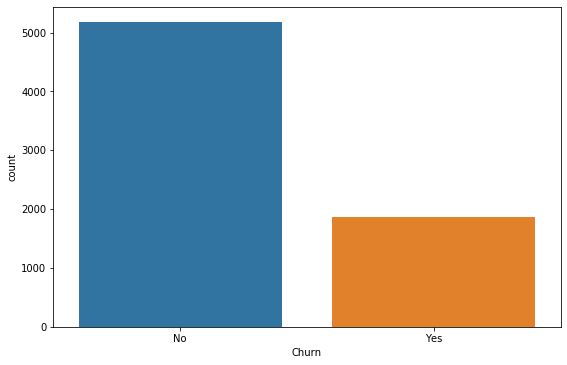

In [8]:
#How many churners are in the dataset?
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 2)
sns.countplot('Churn',data=df,)
print("The Churn-Rate in percent is:" )
print(round((df['Churn'].value_counts()[1] / df['Churn'].count() * 100),2))

In [9]:
(df[df['Churn'] == 'Yes'][['MonthlyCharges','TotalCharges']].sum()) / (df[['MonthlyCharges','TotalCharges']].sum() )

MonthlyCharges    0.305034
TotalCharges      0.178307
dtype: float64

In [10]:
keep = df[df['Churn'] == 'No']['MonthlyCharges'].sum()
keep

316985.75

#### How much money will the company lose in monthly income?



In [11]:
loss = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
loss

139130.85

In [12]:
#What porpotin of money does the company losees?
loss/(keep+loss)*100

30.503351555282137

#### Visualization of churning custumers compared to their spendigs

Text(0.5, 0, 'Total Charges')

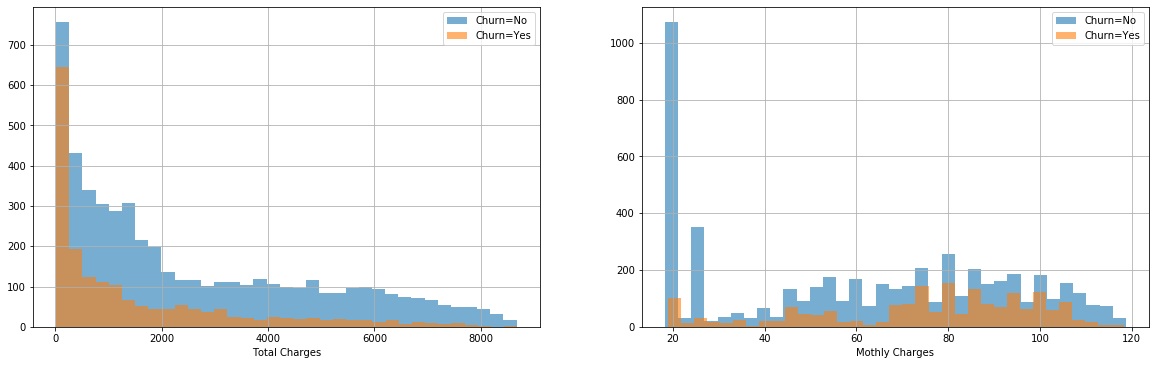

In [13]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 2)
df[df['Churn'] == 'No']['MonthlyCharges'].hist(bins=35, alpha=0.6, label='Churn=No')
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Mothly Charges')


plt.subplot(3, 2, 1)
df[df['Churn'] == 'No']['TotalCharges'].hist(bins=35, alpha=0.6, label='Churn=No')
df[df['Churn'] == 'Yes']['TotalCharges'].hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Total Charges')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


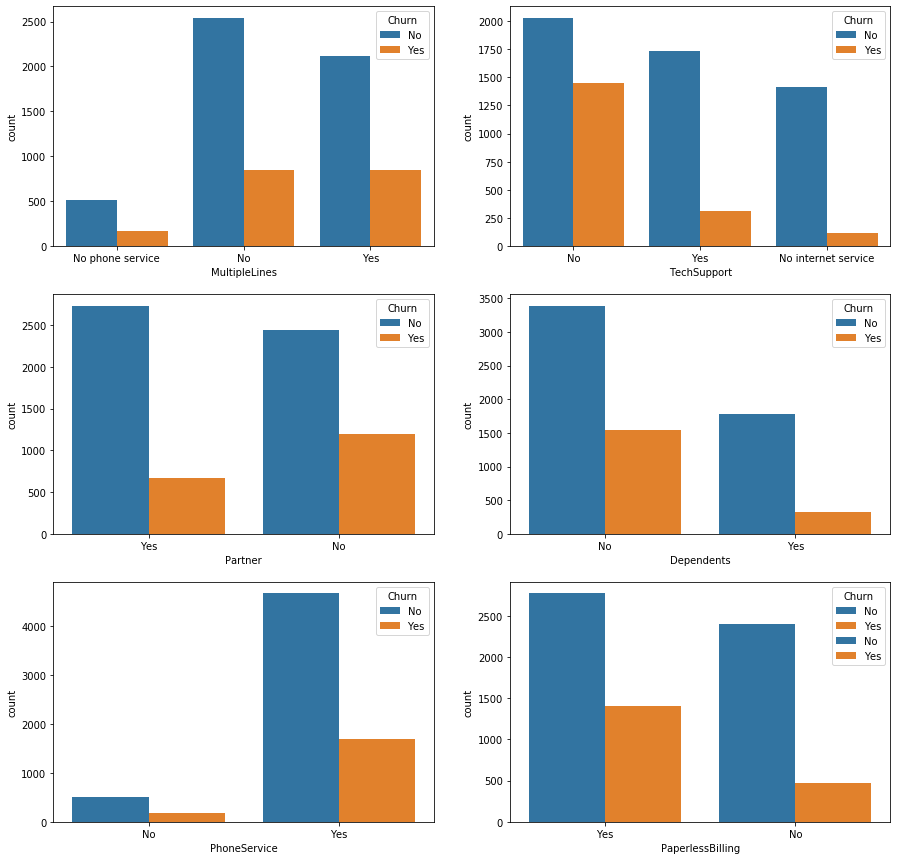

In [14]:
#looking at some more Variabels
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('MultipleLines', data=df, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('TechSupport', data=df, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('Partner', data=df, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('Dependents', data=df, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('PhoneService', data=df, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('PaperlessBilling', data=df, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('PaperlessBilling', data=df, hue='Churn')

# How well we Predict Customer Churn in oder to derive a  campaign to retain our most valuable customers?

# 3.Data Preprocessing


## Feature Engineering

### Missing Values

In [16]:
#Checking for missing Values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df.isnull()['TotalCharges'].mean() * 100# Proportion of missings in percent

0.1561834445548772

In [18]:
#bcause the small porpotion of missings the rows with missings are deleted from the dataset / A mean value imputation would also work 
df1 = df.dropna(subset =['TotalCharges'], axis=0 ) 

### Handle Continues Variabbes

In [19]:
cont_vars = df1[['tenure','TotalCharges','MonthlyCharges']]
cont_vars.head()

,tenure,TotalCharges,MonthlyCharges
0,1,29.85,29.85
1,34,1889.50,56.95
2,2,108.15,53.85
3,45,1840.75,42.30
4,2,151.65,70.70


In [20]:
#Function that groups the tenure column into half years
def tenure_bin (t):
    if t <= 6*1:
        return 1
    elif t<= 6*2:
        return 2
    elif t<= 6*3:
        return 3
    elif t<= 6*4:
        return 4
    elif t<= 6*5:
        return 5
    elif t<= 6*6:
        return 6
    else:
        return 7


### Hanlde Discrete Variables

In [22]:
df1 = df1[['gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure','Churn','TotalCharges','MonthlyCharges']]
df1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,Contract,PaymentMethod,tenure,Churn,TotalCharges,MonthlyCharges
0,Female,0,Yes,No,No,Yes,No phone service,DSL,Month-to-month,Electronic check,1,No,29.85,29.85
1,Male,0,No,No,Yes,No,No,DSL,One year,Mailed check,34,No,1889.50,56.95
2,Male,0,No,No,Yes,Yes,No,DSL,Month-to-month,Mailed check,2,Yes,108.15,53.85
3,Male,0,No,No,No,No,No phone service,DSL,One year,Bank transfer (automatic),45,No,1840.75,42.30
4,Female,0,No,No,Yes,Yes,No,Fiber optic,Month-to-month,Electronic check,2,Yes,151.65,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,Yes,DSL,One year,Mailed check,24,No,1990.50,84.80
7039,Female,0,Yes,Yes,Yes,Yes,Yes,Fiber optic,One year,Credit card (automatic),72,No,7362.90,103.20
7040,Female,0,Yes,Yes,No,Yes,No phone service,DSL,Month-to-month,Electronic check,11,No,346.45,29.60
7041,Male,1,Yes,No,Yes,Yes,Yes,Fiber optic,Month-to-month,Mailed check,4,Yes,306.60,74.40


In [23]:
df1_enc = pd.get_dummies(df1,drop_first = True)

In [24]:
df1_enc

,SeniorCitizen,tenure,TotalCharges,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
1,0,34,1889.50,56.95,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0,2,108.15,53.85,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,0,45,1840.75,42.30,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,2,151.65,70.70,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,1990.50,84.80,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0
7039,0,72,7362.90,103.20,0,1,1,1,1,0,1,1,0,1,0,1,0,0,0
7040,0,11,346.45,29.60,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0
7041,1,4,306.60,74.40,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1


### Correlation Analysis

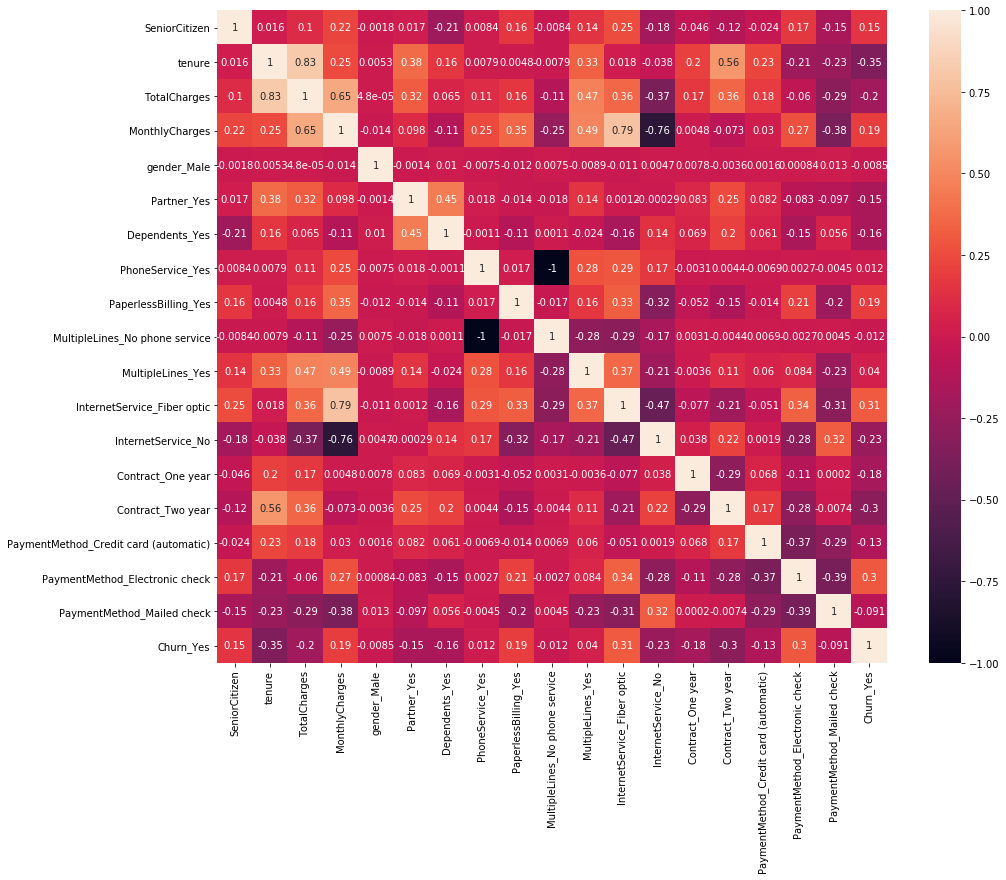

In [25]:
#Correlation Analysis
plt.figure(figsize=(15,12))
sns.heatmap(df1_enc.corr(),annot=True)

#### Variables that correlate with churn

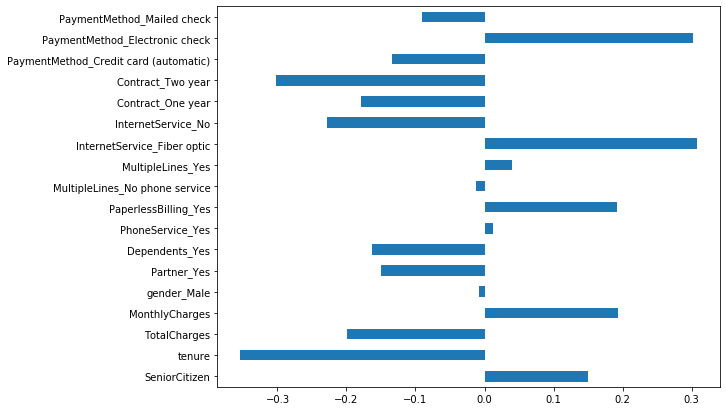

In [26]:
df1_enc.drop('Churn_Yes', axis=1).corrwith(df1_enc['Churn_Yes']).plot(kind='barh', figsize=(9,7))

### Model building (Logistic Regression)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = df1_enc.drop('Churn_Yes', axis=1)
y = df1_enc['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

### Model evaluatuon

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
     
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
       
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [33]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_std, y_train)

print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)

Accuracy Score: 80.62%
_______________________________________________
Classification Report:	Precision Score: 66.09%
			Recall Score: 55.58%
			F1 score: 60.38%
_______________________________________________
Confusion Matrix: 
 [[3241  373]
 [ 581  727]]

Accuracy Score: 79.24%
_______________________________________________
Classification Report:	Precision Score: 63.40%
			Recall Score: 51.87%
			F1 score: 57.06%
_______________________________________________
Confusion Matrix: 
 [[1381  168]
 [ 270  291]]



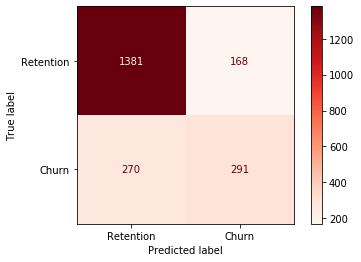

In [30]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(lr_classifier, X_test_std, y_test, 
                             cmap='Reds', values_format='d', 
                             display_labels=['Retention', 'Churn'])

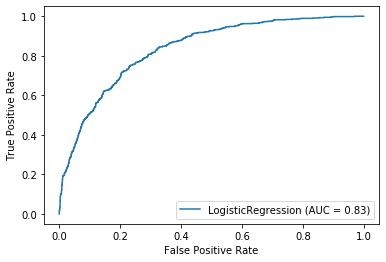

In [31]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)